## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 2 * np.sin(x) - np.cos(2 * x)
df = lambda x: 2 * np.cos(x) + 2 * np.sin(2 * x)
tangent = lambda x, initial_point: f(initial_point) + df(initial_point) * (x - initial_point)

def beauty_derivative_plot(initial_point):
    plt.figure(figsize = (12, 7))
    plt.scatter(initial_point, f(initial_point), c = 'black', zorder = 10)

    x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
    plt.plot(x, f(x), "b-", lw = 0.9, label = 'f(x) = 2sin(x) - cos(2x)')
    plt.plot(x, df(x),  "r--", lw = 0.9, label = "f'(x) = 2cos(x) + 2sin(2x)")

    x_tangent = np.linspace(initial_point - 1, initial_point + 1, 500)
    plt.plot(x_tangent, tangent(x_tangent, initial_point), "g-", lw = 0.9, label = f'Tangent at x = {initial_point:.2f}')

    #plt.plot([initial_point, initial_point], [f(initial_point), 0], "m--", lw = 0.9)
    plt.plot([initial_point, 0], [f(initial_point), f(initial_point)], "m--", lw = 0.9)

    plt.annotate(f"f'({initial_point:.2f}) = {df(initial_point):.2f}", xy = (initial_point, f(initial_point)), xytext = (initial_point - 0.55, f(initial_point) - 2), arrowprops = dict(arrowstyle = '-|>', connectionstyle = 'angle3', facecolor = 'black',  edgecolor = 'black'))

    plt.axis([-2 * np.pi, 2 * np.pi, -4, 4])
    plt.axhline(0, c = 'black', lw = 0.75)
    plt.axvline(0, c = 'black', lw = 0.75)
    plt.xlabel('x')
    plt.ylabel('y')

    plt.title('Function, Derivative, and Tangent Line')
    plt.legend(loc = 'upper right', fontsize = 'medium')
    plt.grid(True)

    plt.show()

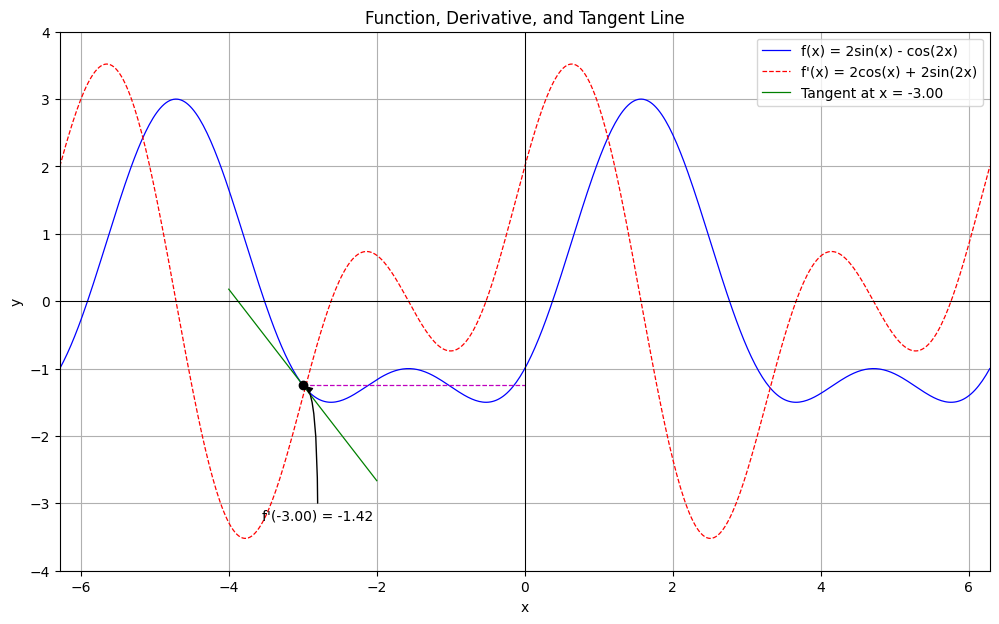

In [ ]:
beauty_derivative_plot(-3)

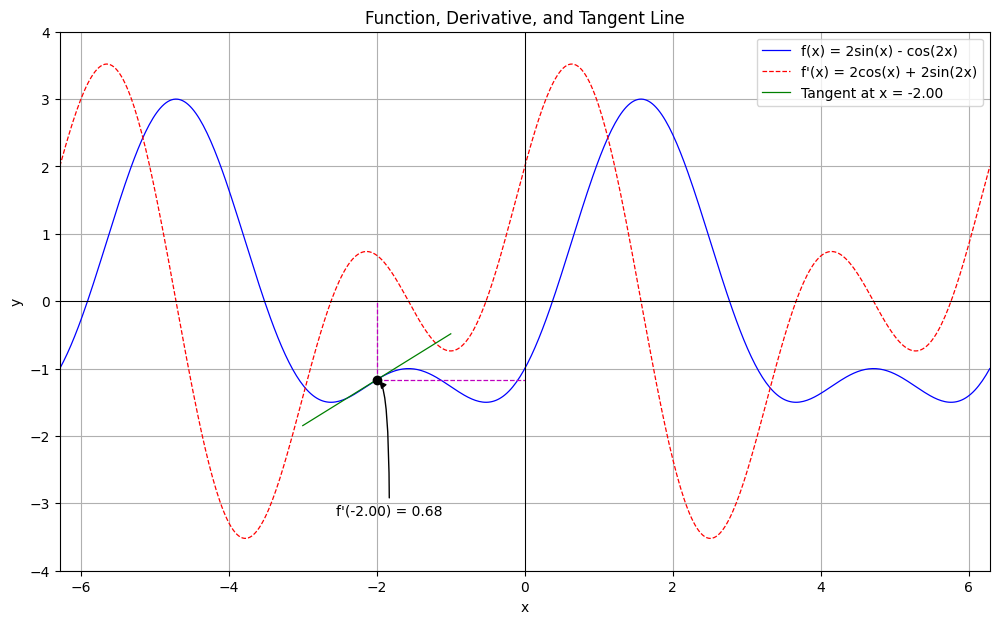

In [ ]:
beauty_derivative_plot(-2)

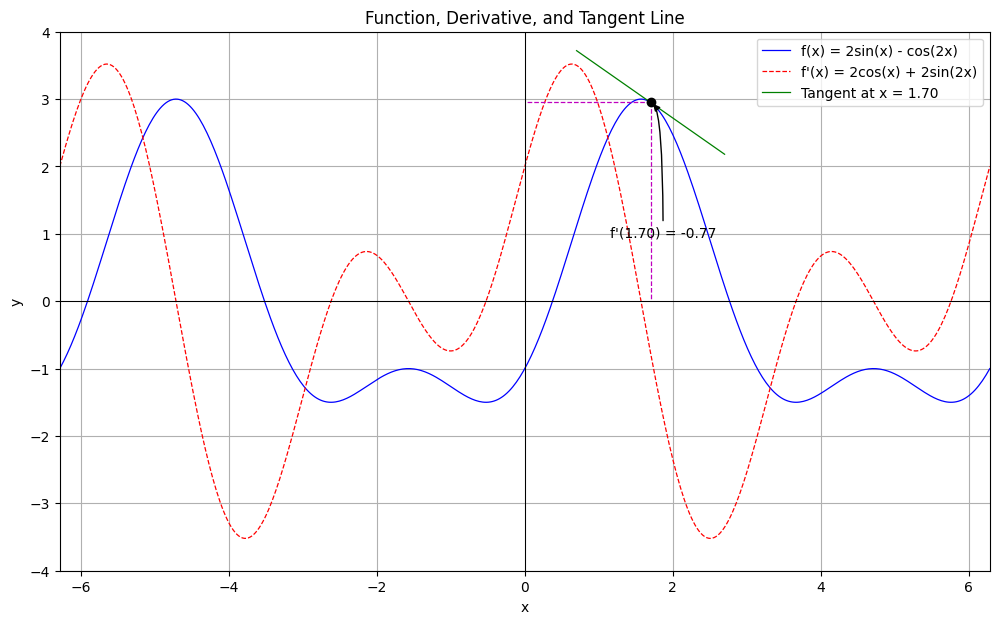

In [ ]:
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

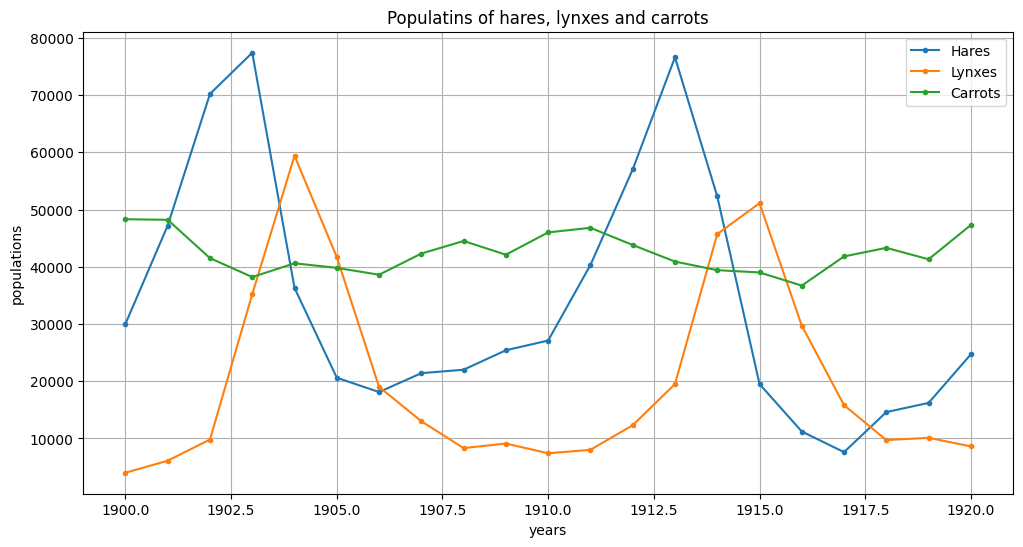

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("populations.txt")
year = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]
plt.figure(figsize=(12, 6))
plt.plot(year, hare, marker = '.', label = "Hares")
plt.plot(year, lynx, marker = '.', label = "Lynxes")
plt.plot(year, carrot, marker = '.', label = "Carrots")
plt.title("Populatins of hares, lynxes and carrots")
plt.xlabel("years")
plt.ylabel("populations")
plt.legend(fontsize = "medium")
plt.grid()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

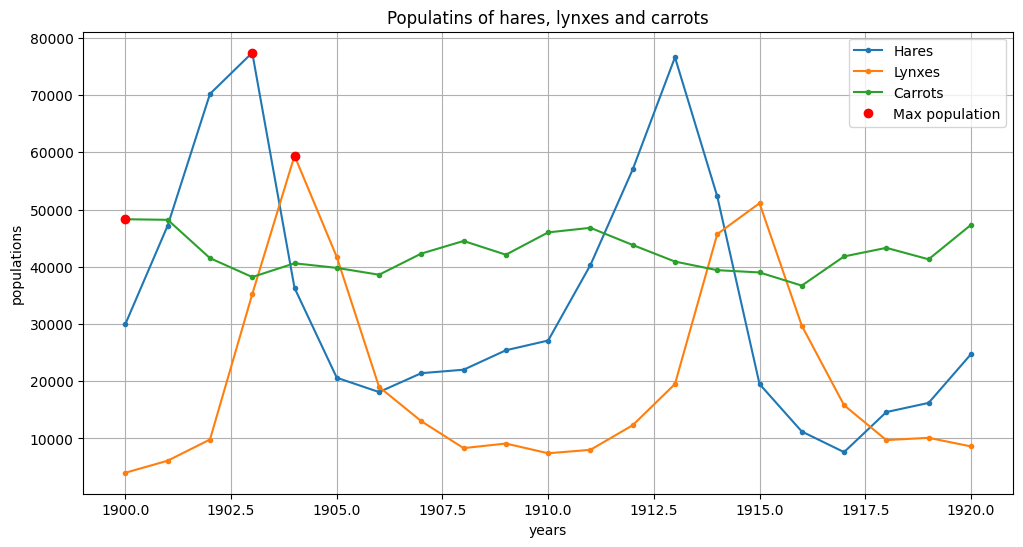

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("populations.txt")
year = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]
plt.figure(figsize=(12, 6))
plt.plot(year, hare, marker = '.', label = "Hares")
plt.plot(year, lynx, marker = '.', label = "Lynxes")
plt.plot(year, carrot, marker = '.', label = "Carrots")
plt.plot(year[np.argmax(hare)], np.max(hare), "ro", label = "Max population")
plt.plot(year[np.argmax(lynx)], np.max(lynx), "ro")
plt.plot(year[np.argmax(carrot)], np.max(carrot), "ro")
plt.title("Populatins of hares, lynxes and carrots")
plt.xlabel("years")
plt.ylabel("populations")
plt.legend(fontsize = "medium")
plt.grid()
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

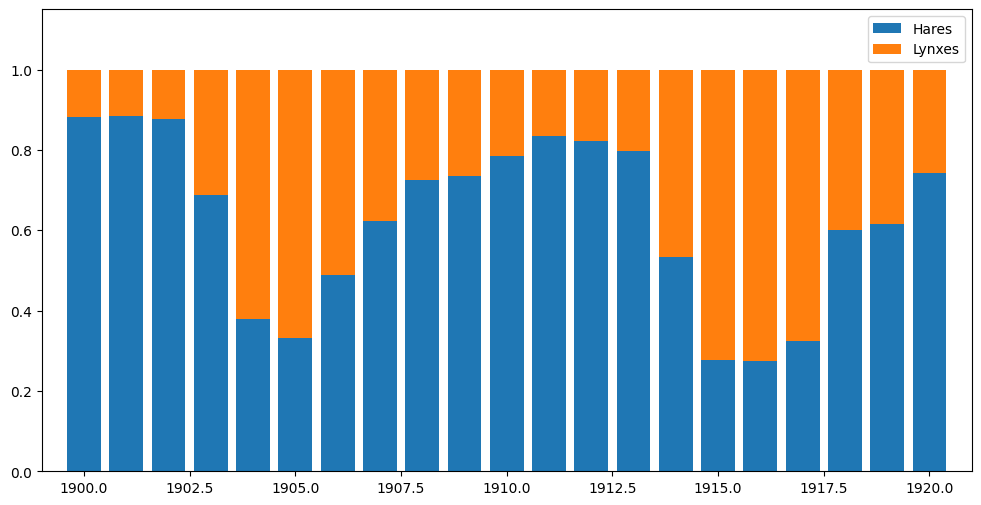

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("populations.txt")
year = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]
plt.figure(figsize=(12, 6))
ratio_hare = hare / (hare + lynx)
ratio_lynx = lynx / (hare + lynx)
plt.bar(year, ratio_hare, label = "Hares")
plt.bar(year, ratio_lynx, bottom = ratio_hare, label = "Lynxes")
plt.axis([1899, 1921, 0, 1.15])
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

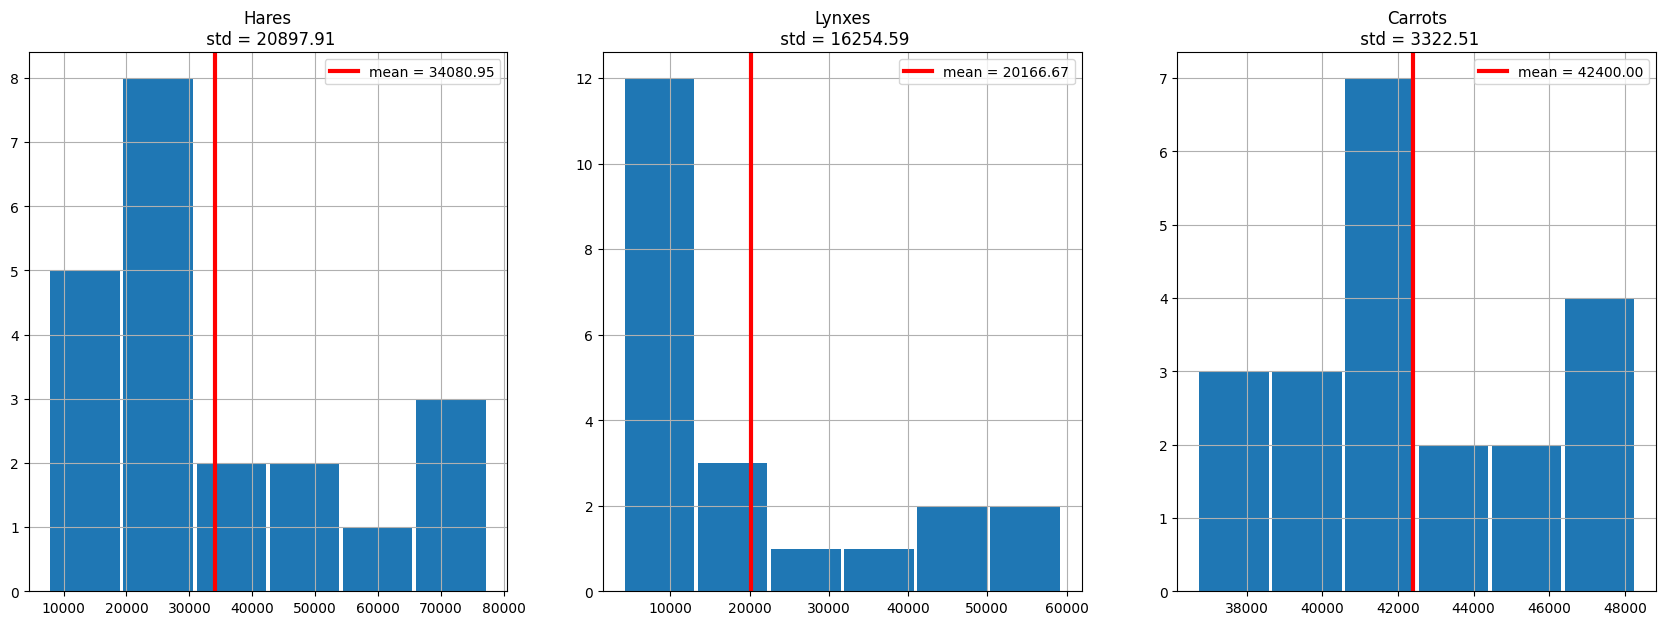

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("populations.txt")
year = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]
fig, (ax_left, ax_med, ax_right) = plt.subplots(1, 3, sharex=False)
fig.set_size_inches(21,7)
hare_mean, lynx_mean, carrot_mean = hare.mean(), lynx.mean(), carrot.mean()
hare_std, lynx_std, carrot_std = hare.std(), lynx.std(), carrot.std()
ax_left.hist(hare, bins = "auto", rwidth=0.95)
ax_left.axvline(hare_mean, c = 'red', lw = 3, label = f'mean = {hare_mean:.2f}')
ax_left.set_title(f'Hares\n std = {hare_std:.2f}')
ax_left.legend()
ax_med.hist(lynx, bins = "auto", rwidth=0.95)
ax_med.axvline(lynx_mean, c = 'red', lw = 3, label = f'mean = {lynx_mean:.2f}')
ax_med.set_title(f'Lynxes\n std = {lynx_std:.2f}')
ax_med.legend()
ax_right.hist(carrot, bins = "auto", rwidth=0.95)
ax_right.axvline(carrot_mean, c = 'red', lw = 3, label = f'mean = {carrot_mean:.2f}')
ax_right.set_title(f'Carrots\n std = {carrot_std:.2f}')
ax_right.legend()
ax_left.grid()
ax_med.grid()
ax_right.grid()
plt.show()


- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


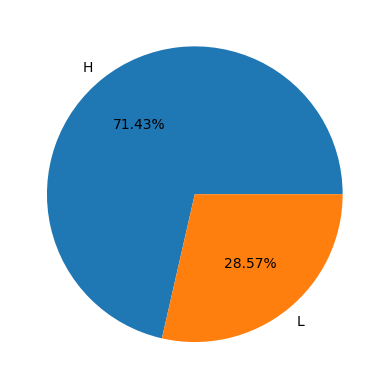

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("populations.txt")
year = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]
arr = np.where(hare > lynx, "H", "L")
print(arr.tolist())
mask = (hare - lynx) > 0
count_H = np.count_nonzero(mask)
count_L = len(year) - count_H
plt.pie([np.sum(arr == 'H'), np.sum(arr == 'L')], labels = ["H", "L"], autopct = '%.2f%%')
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

corrcoef: -0.178


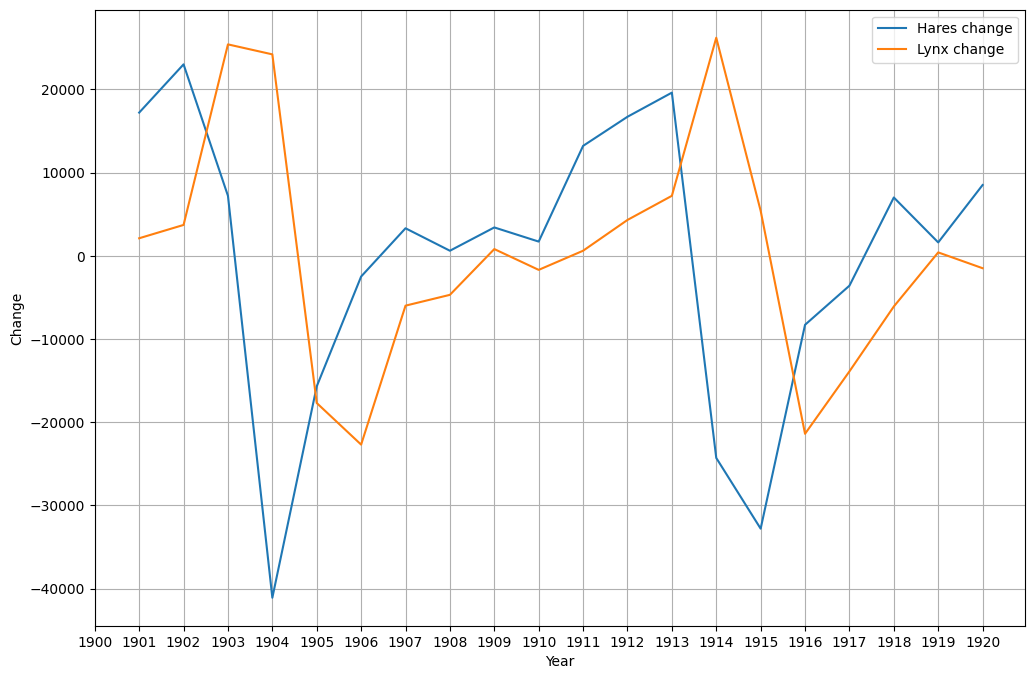

In [5]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("populations.txt")
year = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
hare_diff, lynx_diff = np.diff(hare), np.diff(lynx)
corr = np.corrcoef(hare_diff, lynx_diff)[0, 1]
print(f"corrcoef: {corr:.3f}")
plt.figure(figsize=(12, 8))
plt.plot(year[1:], hare_diff, label='Hares change')
plt.plot(year[1:], lynx_diff, label='Lynx change')

plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Change')
plt.legend()
plt.grid()

plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

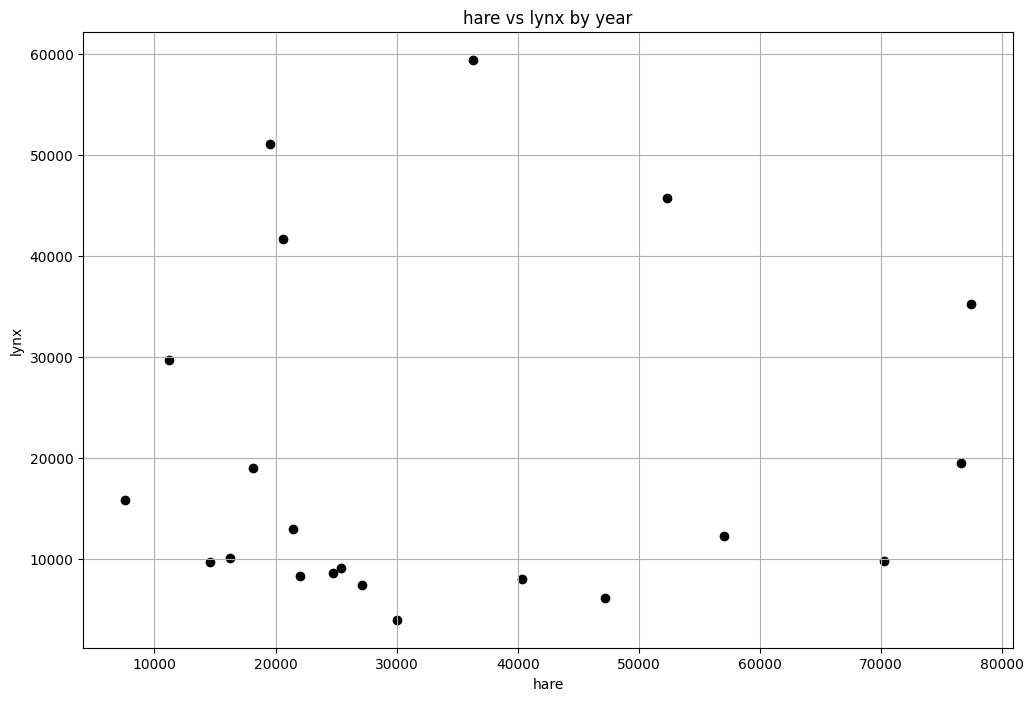

In [6]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("populations.txt")
year = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
plt.figure(figsize=(12, 8))
plt.scatter(hare, lynx, color="k")
plt.xlabel('hare')
plt.ylabel('lynx')
plt.title('hare vs lynx by year')
plt.grid()
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("populations.txt")
year = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
predict = np.mean(hare[year != 1920])
real = hare[year == 1920][0]
error = np.abs(real - predict) / real
print(f'predict = {predict}, \nreal = {real}, \nerror = {error:.3f}')

predict = 34550.0, 
real = 24700.0, 
error = 0.399
